In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

from scipy.stats import ttest_ind

# Hands-On Assignment 5

In this assignment, you will practice everything that you have learned so far in an end-to-end setting.
You will be provided with a dataset that is **unique to you**, and your task is to perform
all the steps from previous assignments to clean, explore, visualize, and analyze your dataset.

**Written Portion**: Additionally, you will create a report that describes your process and provides insights about your dataset.
Each section that should appear in your report is noted with an orange star (like normal HO tasks).  The report should be  4-6 pages (12 pt font, 1.5 line spacing), and turned in on Canvas as a PDF.

The coding aspect for this assignment will be turned in the same was as all other HO's,
by submitting this file to the autograder.


For this assignment, feel free to make additional functions instead of implementing everything in the provided function.

The objective of this assignment is for you to apply and solidify the skills you have learned in previous assignments.

# Prompt

You have graduated from this class, and are a huge success!
You landed a job doing data science at some fancy company.

You just got a new client with some really interesting problems you get to solve.
Unfortunately, because of a big mess-up on their side the data's metadata got corrupted
(and the person that used to maintain the data just took a vow of silence and moved to a bog).

The only column you are sure about is the `label` column,
which contains a numeric label for each row.
Aside from that, the client does not know anything about the names, content, or even data types for each column.

Your task is to explore, clean, and analyze this data.
You should have already received an email with the details on obtaining your unique data.
Place it in the same directory as this notebook (and your `local_grader.py` script) and name it `data.txt`.

*I know this prompt may sound unrealistic, but I have literally been in a situation exactly like this.
I was working at a database startup, and one of our clients gave us data with over 70 columns and more than a million records and told us:
"The person who used to manage the data is no longer working with us, but this was the data they used to make all their decisions.
We also lost all the metadata information, like column names."
...
Working in industry is not always glamorous.
-Eriq*

# Part 0: Explore Your Data

Before you start doing things to/with your data, it's always a good idea to load up your data and take a look.

In [2]:

# path = '/Users/levikanteti/Downloads/akanteti_data.txt'
# Modify this to point to your data.
unique_data = pd.read_csv('data.txt', sep = "\t")
unique_data

,label,col_00,col_01,col_02,col_03,col_04,col_05,col_06,col_07,col_08,col_09
0,3,-1525 m/(s^2),0.5217,long beach,"Boxing, Volleyball, Basketball, Badminton",-175,602,bIOINFORMATICS,0.6738,404,1.0051
1,3,658 m/(s^2),-1.4139,Bakersfield,"basketball, badminton",1228,428,Applied Mathematics,0.2051,1922,1.8846
2,3,1000 m/(s^2),-1.7128,Riverside,"BADMINTON, VOLLEYBALL, BOXING",-532,-836,Bioinformatics,0.5309,-344,1.1662
3,0,2036 m/(s^2),0.9726,Chula Vista,track & field,1132,92,Computer Science,1.4233,2111,0.636
4,2,1722 m/(s^2),1.9874,Sacramento,golf,1515,-51,Bioengineering,-0.2134,-901,0.8419
...,...,...,...,...,...,...,...,...,...,...,...
1323,1,-819 m/(s^2),0.4137,San Diego,baseball,431,390,Computer Science,-0.9475,-209,0.6062
1324,1,524 m/(s^2),0.0465,Moreno Valley,football,1408,1057,Computational Media,-1.0944,875,0.1491
1325,2,-26 m/(s^2),0.3166,Los Angeles,motor sports,84,NaN,Electrical Engineering,-0.2385,-28,-1.36
1326,0,631 m/(s^2),-0.0868,Santa Clarita,soccer,968,1682,Computer Science,0.7513,2213,0.4987


Don't forget to checkout the column information.

In [3]:
unique_data.info() #The other columns have Nulls (between 7 and 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1328 non-null   int64 
 1   col_00  1317 non-null   object
 2   col_01  1314 non-null   object
 3   col_02  1321 non-null   object
 4   col_03  1319 non-null   object
 5   col_04  1322 non-null   object
 6   col_05  1310 non-null   object
 7   col_06  1321 non-null   object
 8   col_07  1315 non-null   object
 9   col_08  1319 non-null   object
 10  col_09  1317 non-null   object
dtypes: int64(1), object(10)
memory usage: 114.3+ KB


And any numeric information.

In [4]:
unique_data.describe()

,label
count,1328.000000
mean,2.006024
std,1.418457
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Introduction</h4>

Briefly describe the dataset you’re given and define the goal of the project and how you approach it.
For example, you can present a basic introduction of your data (shape and proposed data types)
and your goal is to use these features to predict the label of the response variable.
Then you propose a few models that are suitable for this project which will be introduced in the modeling section.

# Part 1: Data Cleaning

As always, we should start with data cleaning.
Take what you learned from HO3 to clean up this messy data to a point where it is ready for machine learning algorithms.

Some things you may want to do:
 - Deal with missing/empty values.
 - Fix numeric columns so that they actually contain numbers.
 - Remove inconsistencies from columns.
 - Assign a data type to each column.

In [5]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1328 non-null   int64 
 1   col_00  1317 non-null   object
 2   col_01  1314 non-null   object
 3   col_02  1321 non-null   object
 4   col_03  1319 non-null   object
 5   col_04  1322 non-null   object
 6   col_05  1310 non-null   object
 7   col_06  1321 non-null   object
 8   col_07  1315 non-null   object
 9   col_08  1319 non-null   object
 10  col_09  1317 non-null   object
dtypes: int64(1), object(10)
memory usage: 114.3+ KB


In [6]:
dirty_dataframe = unique_data.copy(deep=True)
dirty_dataframe['col_00'] = dirty_dataframe['col_00'].str.replace(' m/(s^2)', '', regex=False)


In [7]:
dirty_dataframe

,label,col_00,col_01,col_02,col_03,col_04,col_05,col_06,col_07,col_08,col_09
0,3,-1525,0.5217,long beach,"Boxing, Volleyball, Basketball, Badminton",-175,602,bIOINFORMATICS,0.6738,404,1.0051
1,3,658,-1.4139,Bakersfield,"basketball, badminton",1228,428,Applied Mathematics,0.2051,1922,1.8846
2,3,1000,-1.7128,Riverside,"BADMINTON, VOLLEYBALL, BOXING",-532,-836,Bioinformatics,0.5309,-344,1.1662
3,0,2036,0.9726,Chula Vista,track & field,1132,92,Computer Science,1.4233,2111,0.636
4,2,1722,1.9874,Sacramento,golf,1515,-51,Bioengineering,-0.2134,-901,0.8419
...,...,...,...,...,...,...,...,...,...,...,...
1323,1,-819,0.4137,San Diego,baseball,431,390,Computer Science,-0.9475,-209,0.6062
1324,1,524,0.0465,Moreno Valley,football,1408,1057,Computational Media,-1.0944,875,0.1491
1325,2,-26,0.3166,Los Angeles,motor sports,84,NaN,Electrical Engineering,-0.2385,-28,-1.36
1326,0,631,-0.0868,Santa Clarita,soccer,968,1682,Computer Science,0.7513,2213,0.4987


In [8]:
dirty_dataframe['col_00_numeric'] = pd.to_numeric(dirty_dataframe['col_00'], errors='coerce')
# This forces values to Nan

# Now we can see the stats of this column. If we want to force NaNs to 0, or another value
stats = dirty_dataframe['col_00_numeric'].describe()
print(stats)
value_counts = dirty_dataframe['col_00_numeric'].value_counts()
print(value_counts)

count    1317.000000
mean      458.326500
std       774.961821
min     -2049.000000
25%       -74.000000
50%       455.000000
75%      1000.000000
max      3153.000000
Name: col_00_numeric, dtype: float64
col_00_numeric
 444.0     5
 1225.0    5
 202.0     4
 666.0     4
-154.0     4
          ..
 404.0     1
-123.0     1
 1537.0    1
 1035.0    1
 595.0     1
Name: count, Length: 1056, dtype: int64


In [9]:
median_value_col_00 = dirty_dataframe['col_00_numeric'].median()
median_value_col_00

455.0

<h4 style="color: darkorange; font-size: x-large";>★ Task 1.A</h4>

Complete the following function that takes in a DataFrame and outputs a clean version of the DataFrame.
You can assume that the frame has all the same structure as your unique dataset.
You can return the same or a new data frame.

In [10]:

def clean_data(frame):

    # I have if statements because my code has some issues with the
    # autograder, for that reason I have checks for existing columns

    if 'col_00' in frame.columns:
        frame.rename(columns={'col_00': 'm/(s^2)'}, inplace=True)
    # This replaces the column with the term used in it's values
    if 'm/(s^2)' in frame.columns:
        frame['m/(s^2)'] = frame['m/(s^2)'].str.replace(' m/(s^2)', '', regex=False)
    # Here we remove this term because the column name contains it

    # Previously I saw the value of col_00 and I believe it's best to fill
    # NaN values with the median instead of 0 like we typically do

    if 'm/(s^2)' in frame.columns:
        frame['m/(s^2)'] = pd.to_numeric(frame['m/(s^2)'], errors='coerce')
        median_value_col_00 = frame['m/(s^2)'].median()
        frame['m/(s^2)'] = frame['m/(s^2)'].fillna(median_value_col_00)
        if frame['m/(s^2)'].mod(1).eq(0).all():
            frame['m/(s^2)'] = frame['m/(s^2)'].astype(int)
    # Here we turn it into the type of int and filled NaNs with the median

    # These columns are very similar to ints, so goign to repeat above steps
    columns_to_convert = ['col_01', 'col_04', 'col_05', 'col_07', 'col_08', 'col_09']

    for col in columns_to_convert:
        if col in frame.columns:
            frame[col] = pd.to_numeric(frame[col], errors='coerce')
            median_value = frame[col].median()
            frame[col] = frame[col].fillna(median_value)
            if frame[col].mod(1).eq(0).all():
                frame[col] = frame[col].astype(int)

    # Now we have columns 02, 03, and 06 and I want to do one-hot encoding

    # For column 02, first clean up the values to remove white spaces and get it all lowered
    # So 'long beach' -> 'longbeach' and 'Bakersfield ' -> 'bakersfield'

    if 'col_02' in frame.columns:
        frame['col_02'] = frame['col_02'].fillna('?')
    # I used a ? symbol because the data already contains '?' for some values
    
        frame['col_02'] = frame['col_02'].astype(str)

        frame['col_02'] = frame['col_02'].str.lower().str.replace(' ', '').str.strip()
        
        unique_values = frame['col_02'].unique()

        print(unique_values) 

    # Now one-hot encoding on col_02

        one_hot_encoded = pd.get_dummies(frame['col_02'], prefix='col_02')

        frame = pd.concat([frame, one_hot_encoded], axis=1)

        frame.drop(columns=['col_02'], inplace=True)

    # Now for column 06 which seems to contain majors.

    if 'col_06' in frame.columns:
        frame['col_06'] = frame['col_06'].fillna('?')
    # I used a ? symbol because the data already contains '?' for some values
        
        frame['col_06'] = frame['col_06'].astype(str)

        frame['col_06'] = frame['col_06'].str.lower().str.replace(' ', '').str.strip()

        one_hot_encoded = pd.get_dummies(frame['col_06'], prefix='col_06')

        frame = pd.concat([frame, one_hot_encoded], axis=1)

        frame.drop(columns=['col_06'], inplace=True)

    # Now we're onto column 03.
    # Column 03 has values that can be in lists (so multiple sports)
    # It also has white spaces and capitalizations which make the data dirty
    
    if 'col_03' in frame.columns:
        frame['col_03'] = frame['col_03'].fillna('')

    # Main logic

        sports = frame['col_03'].str.lower() \
                                .str.replace(' ', '') \
                                .str.strip() \
                                .str.get_dummies(sep=',')

        frame = pd.concat([frame, sports], axis=1)

        frame.drop(columns=['col_03'], inplace=True)

    return frame
"""

def clean_data(frame):

    def try_convert_numeric(value):
        try:
            # Remove non-numeric text and convert to float
            numeric_value = float(''.join(char for char in str(value)
                                          if char.isdigit() or char in ".-"))
            # If it's an integer-like float, convert to int
            if numeric_value.is_integer():
                return int(numeric_value)
            return numeric_value
        except ValueError:
            return None

    for col in frame.columns:
        # Check if the column is of object type
        if frame[col].dtype == 'object':
            # Attempt to clean and convert the column to numeric
            frame[col] = frame[col].apply(try_convert_numeric)
            # Fill NaNs with the median and decide the final type
            if frame[col].notna().sum() > 0:  # Ensure the column has valid values
                median_value = frame[col].median()
                frame[col].fillna(median_value, inplace=True)
                # Convert to int if all values are integer-like
                if frame[col].mod(1).eq(0).all():
                    frame[col] = frame[col].astype(int)

    return frame
"""
unique_data = clean_data(unique_data)
unique_data

['longbeach' 'bakersfield' 'riverside' 'chulavista' 'sacramento'
 'morenovalley' 'santaana' 'sanfrancisco' 'fremont' 'losangeles'
 'sanbernardino' 'irvine' 'sandiego' 'sanjose' 'stockton' 'anaheim'
 'santaclarita' 'oakland' 'modesto' 'fresno' '?']


,label,m/(s^2),col_01,col_04,col_05,col_07,col_08,col_09,col_02_?,col_02_anaheim,...,boxing,football,golf,icehockey,motorsports,running,soccer,tennis,track&field,volleyball
0,3,-1525,0.5217,-175,602.0,0.6738,404,1.0051,False,False,...,1,0,0,0,0,0,0,0,0,1
1,3,658,-1.4139,1228,428.0,0.2051,1922,1.8846,False,False,...,0,0,0,0,0,0,0,0,0,0
2,3,1000,-1.7128,-532,-836.0,0.5309,-344,1.1662,False,False,...,1,0,0,0,0,0,0,0,0,1
3,0,2036,0.9726,1132,92.0,1.4233,2111,0.6360,False,False,...,0,0,0,0,0,0,0,0,1,0
4,2,1722,1.9874,1515,-51.0,-0.2134,-901,0.8419,False,False,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1,-819,0.4137,431,390.0,-0.9475,-209,0.6062,False,False,...,0,0,0,0,0,0,0,0,0,0
1324,1,524,0.0465,1408,1057.0,-1.0944,875,0.1491,False,False,...,0,1,0,0,0,0,0,0,0,0
1325,2,-26,0.3166,84,449.5,-0.2385,-28,-1.3600,False,False,...,0,0,0,0,1,0,0,0,0,0
1326,0,631,-0.0868,968,1682.0,0.7513,2213,0.4987,False,False,...,0,0,0,0,0,0,1,0,0,0


In [11]:
pd.set_option('display.max_columns', None)


In [12]:
unique_data

,label,m/(s^2),col_01,col_04,col_05,col_07,col_08,col_09,col_02_?,col_02_anaheim,col_02_bakersfield,col_02_chulavista,col_02_fremont,col_02_fresno,col_02_irvine,col_02_longbeach,col_02_losangeles,col_02_modesto,col_02_morenovalley,col_02_oakland,col_02_riverside,col_02_sacramento,col_02_sanbernardino,col_02_sandiego,col_02_sanfrancisco,col_02_sanjose,col_02_santaana,col_02_santaclarita,col_02_stockton,col_06_?,col_06_appliedmathematics,col_06_bioengineering,col_06_bioinformatics,col_06_biotechnology,col_06_computationalmedia,col_06_computerengineering,col_06_computergamedesign,col_06_computerscience,col_06_datascience,col_06_electricalengineering,col_06_gamesandplayablemedia,col_06_humancomputerinteraction,col_06_naturallanguageprocessing,col_06_roboticsengineering,col_06_statistics,col_06_technologyandinformationmanagement,?,badminton,baseball,basketball,boxing,football,golf,icehockey,motorsports,running,soccer,tennis,track&field,volleyball
0,3,-1525,0.5217,-175,602.0,0.6738,404,1.0051,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1,0,1,1,0,0,0,0,0,0,0,0,1
1,3,658,-1.4139,1228,428.0,0.2051,1922,1.8846,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,3,1000,-1.7128,-532,-836.0,0.5309,-344,1.1662,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,0,2036,0.9726,1132,92.0,1.4233,2111,0.6360,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,1722,1.9874,1515,-51.0,-0.2134,-901,0.8419,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1,-819,0.4137,431,390.0,-0.9475,-209,0.6062,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1324,1,524,0.0465,1408,1057.0,-1.0944,875,0.1491,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1325,2,-26,0.3166,84,449.5,-0.2385,-28,-1.3600,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1326,0,631,-0.0868,968,1682.0,0.7513,2213,0.4987,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Now we should also be able to view all the numeric columns.

In [13]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 60 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   label                                      1328 non-null   int64  
 1   m/(s^2)                                    1328 non-null   int64  
 2   col_01                                     1328 non-null   float64
 3   col_04                                     1328 non-null   int64  
 4   col_05                                     1328 non-null   float64
 5   col_07                                     1328 non-null   float64
 6   col_08                                     1328 non-null   int64  
 7   col_09                                     1328 non-null   float64
 8   col_02_?                                   1328 non-null   bool   
 9   col_02_anaheim                             1328 non-null   bool   
 10  col_02_bakersfield      

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Data Cleaning</h4>

Describe the steps you took for data cleaning.
Why did you do this?
Did you have to make some choices along the way? If so, describe them.

I first started off with making a copy of the dataset that I could mess around with, and I first attempted to understand col_00. I started by removing the ' m/(s^2)' that each value under the column had, and renamed the column from col_00 to m/s(^2) because it conveyed more information that way. Afterwards I turned the values into ints and printed the .describe() function. I noticed how the median was 455, but there were values over 3000 and under -2000. Before I noticed that all the columns had Nulls, so I chose to replace the nulls in this column with the median value (which was 455). Originally I thought of replacing it with 0, but then I realized that this would've altered the data in a way that I didn't want.

After finishing the first column I understood the process and repeated this process of converting the Nulls, finding the median, filling the Nulls with the median value, and converting the column to int Dtype.
I did this for col_00 (manually) and automatically for col_01, col_04,col_05,col_07,col_08, and col_09.

I avoided doing this for col_02, 03, and 06 because they didn't have integer values.

For these I looked at the values and wanted to enable one-hot encoding.

For example I looked at col_02. Originally I filled all NaNs with 'none' but later changed this to '?' because there was already that column. I then converted the column to a string and lowered all the characters and removed all the white spaces.

I did this because there were city names that had capitalizations and some that didn't. There were also cities with spaces and some without. I did this to ensure that 'San Jose' would be considered the same as 'san jose' (same with other cities).

Afterwards I printed all the unique values just to double check and it looked good to me.

I then performed one-hot encoding using the prefix col_02 (just to know at a quick glace what the new columns were from) and afterwards dropped col_02.

Colunn 06 had majors, and I did the same procedure as column 02. Here the prefix I chose was col_06, and I also filled NaNs with a ? because the data already had that as a value.

I saved column_03 for last because it's data was the weirdest to clean. Some of the sports listed in the rows had one sport, while others had a list of values.

I decided to fill any NaN values with '' (just to not have to deal with them)

And then I used this logic to separate and classify the values inside the column:

Lower (some values had capitalizations, while others didn't)
Remove spaces (just to be sure)
Strip any white spaces (in case of leading or trailing spaces)
Turn a list of values into separate things. I used .get_dummies() this separates the string into a dataframe with multiple binary columns (dummy variables). This is essentually one-hot encoding on rows that have multiple sports

After dealing with the columns I would append the new dataframe columns and drop the column I worked on (here it was col_03)


Afterwards I returned the dataframe and inspected it just to be sure everything is as I expected it to be.

# Part 2: Data Visualization

Once you have cleaned up the data, it is time to explore it and find interesting things.
Part of this exploration, will be visualizing the data in a way that makes it easier for yourself and others to understand.
Use what you have learned in HO1 and HO2 to create some visualizations for your dataset.

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Data Visualization</h4>

Create at least two different visualizations that help describe what you see in your dataset.
Include these visualizations in your report along with descriptions of
how you created the visualization,
what data preparation you had to do for the visualization (aside from the data cleaning in the previous part),
and what the visualization tells us about the data.

Here I'm going to look at the distribution of label (using a bar chart) and show the count of each unique value in the column (to see the distribution).

/var/folders/tk/pjnqp4tx1wz1_fkfd4dcpjdc0000gn/T/ipykernel_68406/890410878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=unique_data, x='label', palette='viridis')


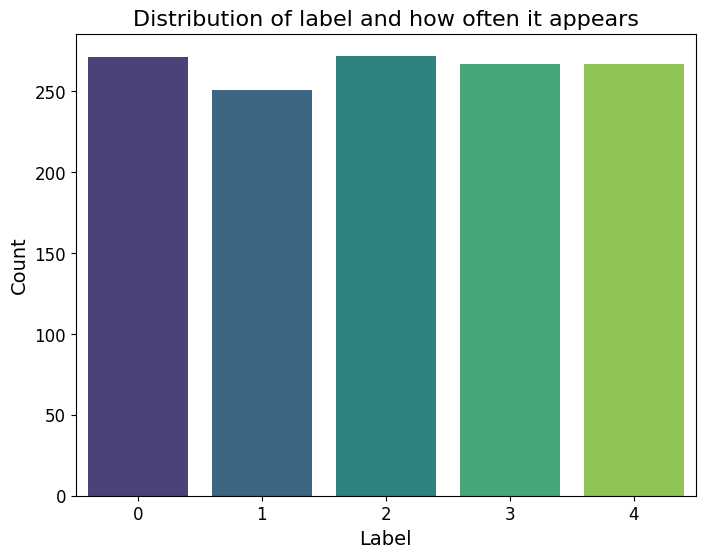

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=unique_data, x='label', palette='viridis')

plt.title('Distribution of label and how often it appears', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Here I'll look at the distribution of m/ s(^2).

In [15]:
unique_data

,label,m/(s^2),col_01,col_04,col_05,col_07,col_08,col_09,col_02_?,col_02_anaheim,col_02_bakersfield,col_02_chulavista,col_02_fremont,col_02_fresno,col_02_irvine,col_02_longbeach,col_02_losangeles,col_02_modesto,col_02_morenovalley,col_02_oakland,col_02_riverside,col_02_sacramento,col_02_sanbernardino,col_02_sandiego,col_02_sanfrancisco,col_02_sanjose,col_02_santaana,col_02_santaclarita,col_02_stockton,col_06_?,col_06_appliedmathematics,col_06_bioengineering,col_06_bioinformatics,col_06_biotechnology,col_06_computationalmedia,col_06_computerengineering,col_06_computergamedesign,col_06_computerscience,col_06_datascience,col_06_electricalengineering,col_06_gamesandplayablemedia,col_06_humancomputerinteraction,col_06_naturallanguageprocessing,col_06_roboticsengineering,col_06_statistics,col_06_technologyandinformationmanagement,?,badminton,baseball,basketball,boxing,football,golf,icehockey,motorsports,running,soccer,tennis,track&field,volleyball
0,3,-1525,0.5217,-175,602.0,0.6738,404,1.0051,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1,0,1,1,0,0,0,0,0,0,0,0,1
1,3,658,-1.4139,1228,428.0,0.2051,1922,1.8846,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,3,1000,-1.7128,-532,-836.0,0.5309,-344,1.1662,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,0,2036,0.9726,1132,92.0,1.4233,2111,0.6360,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,1722,1.9874,1515,-51.0,-0.2134,-901,0.8419,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1,-819,0.4137,431,390.0,-0.9475,-209,0.6062,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1324,1,524,0.0465,1408,1057.0,-1.0944,875,0.1491,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1325,2,-26,0.3166,84,449.5,-0.2385,-28,-1.3600,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1326,0,631,-0.0868,968,1682.0,0.7513,2213,0.4987,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0


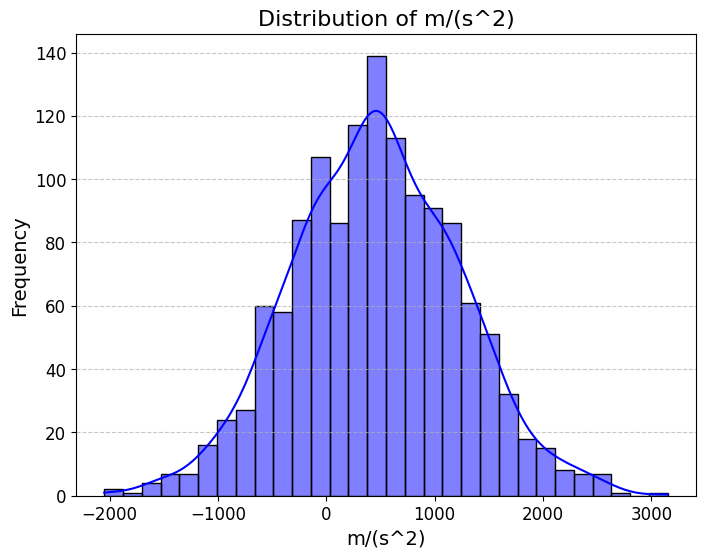

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=unique_data, x='m/(s^2)', kde=True, color='blue', bins=30)

plt.title('Distribution of m/(s^2)', fontsize=16)
plt.xlabel('m/(s^2)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Here I'm going to look at the proportion of True/False for each of the columns that have boolean values (this is useful because many columns are boolean from one-hot encoding).



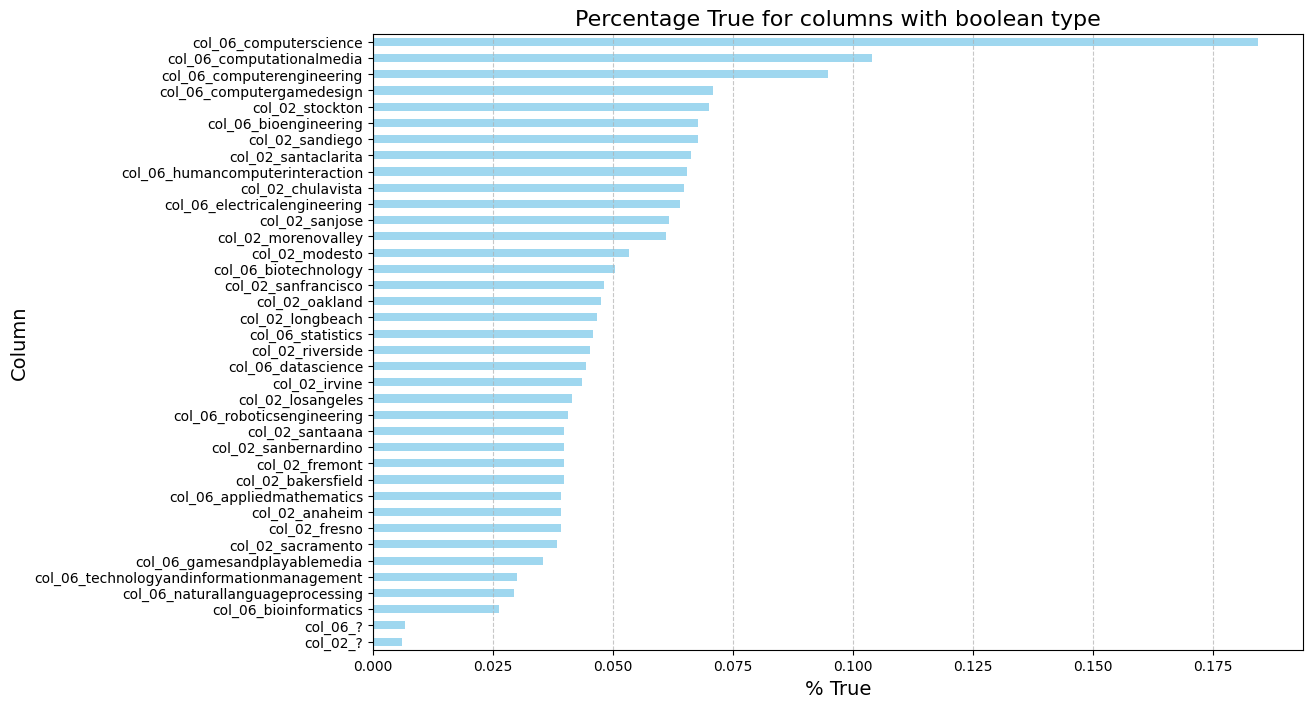

In [ ]:
# Only grab columns with boolean type
bool_columns = unique_data.select_dtypes(include=['bool']).columns

# Proportion of True (versus False) and sorted in descending order
bool_summary = unique_data[bool_columns].mean().sort_values()

plt.figure(figsize=(12, 8))
bool_summary.plot(kind='barh', color='skyblue', alpha=0.8)
plt.title('Percentage True for columns with boolean type', fontsize=16)
plt.xlabel('% True', fontsize=14)
plt.ylabel('Column', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Part 3: Modeling

Now that you have a good grasp of your clean data,
it is time to do some machine learning!
(Technically all our previous steps were also machine learning,
but now we get to use classifiers!)

Use the skills you developed to select **three** classifiers and implement them on your data.
For example, you can narrow down your choices to three classifiers which may include:
- Logistic regression
- K-nearest neighbors
- Decision tree
- Or others

<h4 style="color: darkorange; font-size: x-large";>★ Task 3.A</h4>

Complete the following function that takes in no parameters,
and returns a list with **three** untrained classifiers you are going to explore in this assignment.
This method may set parameters/options for the classifiers, but should not do any training/fitting.

For example, if you wanted to use logistic regression,
then **one** of your list items may be:
```
sklearn.linear_model.LogisticRegression()
```

In [18]:
def create_classifiers():
    
    classifiers = [
        LogisticRegression(),
        KNeighborsClassifier(),
        DecisionTreeClassifier()
    ]
    
    return classifiers

my_classifiers = create_classifiers()
my_classifiers

[LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier()]

Now that we have some classifiers, we can see how they perform.

<h4 style="color: darkorange; font-size: x-large";>★ Task 3.B</h4>

Complete the following function that takes in an untrained classifier, a DataFrame, and a number of folds.
This function should run k-fold cross validation with the classifier and the data,
and return a list with the accuracy of each run of cross validation.
You can assume that the frame has the column `label` and the rest of the columns can be considered clean numeric features.

Note that you may have to break your frame into features and labels to do this.
Do not change the passed-in frame (make copies instead).

If you are getting any `ConvergenceWarning`s you may either ignore them,
or try and address them
(they will not affect your autograder score, but may be something to discuss in the written portion of this assignment).

In [19]:
def cross_fold_validation(classifier, frame, folds):
    # Ensure the frame copy has a reset index to avoid splitting issues
    data = frame.copy().reset_index(drop=True)
    
    # Separate features (X) and target (y)
    X = data.drop(columns='label', errors='ignore')  # Drop 'label' if it exists
    y = data['label'].copy() if 'label' in data.columns else None  # Handle missing 'label'

    # Ensure X is numeric only
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # KFold cross-validation
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    
    # List to store accuracy scores
    accuracy_scores = []

    for train_index, test_index in kf.split(X):
        # Train-test split
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf = classifier.__class__(**classifier.get_params())  # Clone classifier
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(round(accuracy, 4))  # Round accuracy for precision consistency
    
    return accuracy_scores

my_classifiers_scores = []
for classifier in my_classifiers:
    accuracy_scores = cross_fold_validation(classifier, unique_data, 5)
    my_classifiers_scores.append(accuracy_scores)
    print("Classifier: %s, Accuracy: %s." % (type(classifier).__name__, accuracy_scores))

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classifier: LogisticRegression, Accuracy: [0.9887, 0.9774, 0.9774, 0.9849, 0.9736].
Classifier: KNeighborsClassifier, Accuracy: [0.2368, 0.2481, 0.282, 0.283, 0.2226].
Classifier: DecisionTreeClassifier, Accuracy: [0.9323, 0.9511, 0.9398, 0.9547, 0.9509].


<h4 style="color: darkorange; font-size: x-large";>★ Task 3.C</h4>

Complete the following function that takes in two equally-sized lists of numbers and a p-value.
This function should compute whether there is a statistical significance between
these two lists of numbers using a [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)
at the given p-value.
Return `True` if there is a statistical significance, and `False` otherwise.
Hint: If you wish, you may use the `ttest_ind()` [method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) provided in the scipy package. 

In [20]:
def significance_test(a_values, b_values, p_value):
    # Perform a two-tailed t-test
    t_stat, p = ttest_ind(a_values, b_values)

    # Check if the p-value is below the significance threshold
    return p < p_value

for i in range(len(my_classifiers)):
    for j in range(i + 1, len(my_classifiers)):
        significant = significance_test(my_classifiers_scores[i], my_classifiers_scores[j], 0.10)
        print("%s vs %s: %s" % (type(my_classifiers[i]).__name__,
                                type(my_classifiers[j]).__name__, significant))

LogisticRegression vs KNeighborsClassifier: True
LogisticRegression vs DecisionTreeClassifier: True
KNeighborsClassifier vs DecisionTreeClassifier: True


In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [22]:
def cross_fold_validation_with_f1(classifier, frame, folds):
    # Ensure the frame copy has a reset index to avoid splitting issues
    data = frame.copy().reset_index(drop=True)
    
    # Separate features (X) and target (y)
    X = data.drop(columns='label', errors='ignore')  # Drop 'label' if it exists
    y = data['label'].copy() if 'label' in data.columns else None  # Handle missing 'label'

    # Ensure X is numeric only
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
    
    # KFold cross-validation
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)
    
    # Lists to store accuracy and F1 scores
    accuracy_scores = []
    f1_scores = []

    for train_index, test_index in kf.split(X):
        # Train-test split
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf = classifier.__class__(**classifier.get_params())  # Clone classifier
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted for multi-class
        
        accuracy_scores.append(round(accuracy, 4))  # Round accuracy for precision consistency
        f1_scores.append(round(f1, 4))             # Round F1 score for precision consistency
    
    return accuracy_scores, f1_scores


In [23]:
def plot_multiclass_roc_curve(classifier, X, y):
    # Binarize the labels for multiclass ROC curve plotting
    y_bin = label_binarize(y, classes=list(set(y)))
    n_classes = y_bin.shape[1]

    # Split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

    # Train the One-vs-Rest classifier
    clf = OneVsRestClassifier(classifier.__class__(**classifier.get_params()))
    clf.fit(X_train, y_train)

    # Get predicted probabilities for each class
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)
    else:
        print(f"{type(classifier).__name__} does not support predict_proba.")
        return

    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    colors = ['blue', 'red', 'green', 'purple', 'orange']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Label {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title(f'ROC Curve for {type(classifier).__name__}')
    plt.legend(loc="lower right")
    plt.show()


/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classifier: LogisticRegression
Accuracy Scores: [0.9887, 0.9774, 0.9774, 0.9849, 0.9736]
F1 Scores: [0.9887, 0.9774, 0.9774, 0.9849, 0.9736]


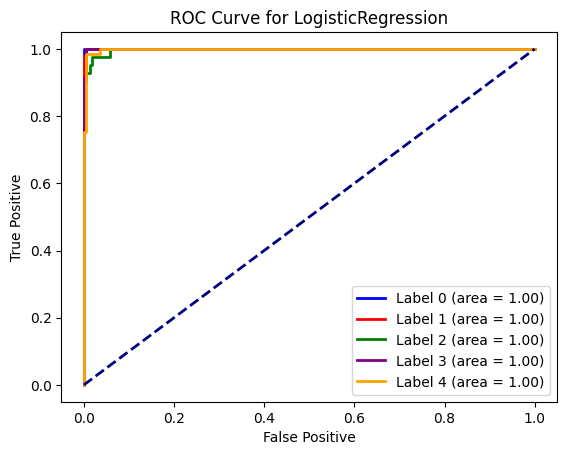

Classifier: KNeighborsClassifier
Accuracy Scores: [0.2368, 0.2481, 0.282, 0.283, 0.2226]
F1 Scores: [0.2417, 0.2412, 0.2819, 0.2832, 0.2272]


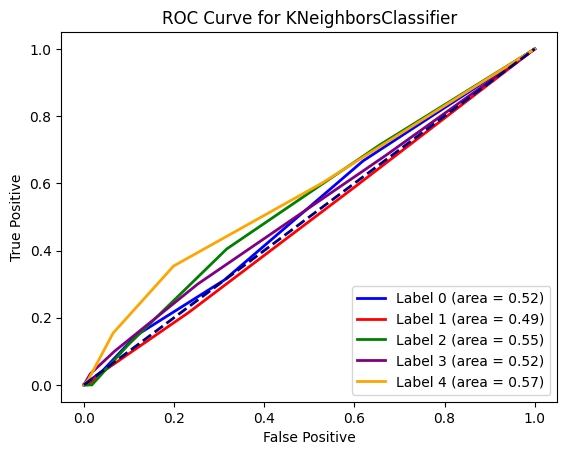

Classifier: DecisionTreeClassifier
Accuracy Scores: [0.9323, 0.9511, 0.9361, 0.9547, 0.9509]
F1 Scores: [0.9326, 0.9512, 0.9359, 0.9545, 0.9508]


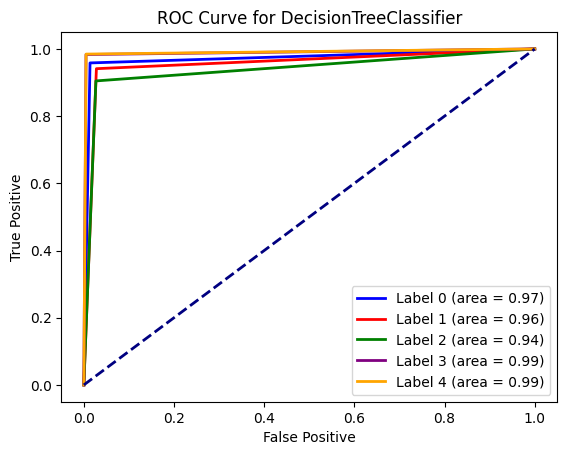

In [24]:
for classifier in my_classifiers:
    # Perform cross-validation and calculate metrics
    accuracy_scores, f1_scores = cross_fold_validation_with_f1(classifier, unique_data, 5)
    print(f"Classifier: {type(classifier).__name__}")
    print(f"Accuracy Scores: {accuracy_scores}")
    print(f"F1 Scores: {f1_scores}")

    # Plot ROC curve
    X = unique_data.drop(columns='label')
    y = unique_data['label']
    plot_multiclass_roc_curve(classifier, X, y)


In [25]:
print(unique_data['label'].unique())


[3 0 2 1 4]


In [26]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Modeling</h4>

Describe the classifiers you have chosen.
Be sure to include all details about any parameter settings used for the algorithms.

Compare the performance of your models using k-fold validation.
You may look at accuracy, F1 or other measures.

Then, briefly summarize your results.
Are your results statistically significant?
Is there a clear winner?
What do the standard deviations look like, and what do they tell us about the different models?
Include a table like Table 1.

<center>Table 1: Every table needs a caption.</center>

| Model | Mean Accuracy | Standard Deviation of Accuracy |
|-------|---------------|--------------------------------|
| Logistic Regression | 0.724 | 0.004
| K-Nearest Neighbor | 0.750 | 0.003
| Decision Tree | 0.655 | 0.011

# Part 4: Analysis

Now, take some time to go over your results for each classifier and try to make sense of them.
 - Why do some classifiers work better than others?
 - Would another evaluation metric work better than vanilla accuracy?
 - Is there still a problem in the data that should fixed in data cleaning?
 - Does the statistical significance between the different classifiers make sense?
 - Are there parameters for the classifier that I can tweak to get better performance?

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Analysis</h4>

Discuss your observations, the relationship you found, and how you applied concepts from the class to this project.
For example, you may find that some feature has the most impact in predicting your response variable or removing a feature improves the model accuracy.
Or you may observe that your training accuracy is much higher than your test accuracy and you may want to explain what issues may arise.

# Part 5: Conclusion

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: Conclusion</h4>

Briefly summarize the important results and conclusions presented in the project.
What are the important points illustrated by your work?
Are there any areas for further investigation or improvement?

<h4 style="color: darkorange; font-size: x-large";>★ Written Task: References</h4>

Include a standard bibliography with citations referring to techniques or published papers you used throughout your report (if you used any).

For example:
```
[1] Derpanopoulos, G. (n.d.). Bayesian Model Checking & Comparison.
https://georgederpa.github.io/teaching/modelChecking.html.
```

# Part XC: Extra Credit

So far you have used a synthetic dataset that was created just for you.
But, data science is always more interesting when you are dealing with actual data from the real world.
Therefore, you will have an opportunity for extra credit on this assignment using real-world data.

For extra credit, repeat the **written tasks** of Parts 0 through 4 with an additional dataset that you find yourself.
For the written portion of the extra credit for Part 0, include information about where you got the data and what the data represents.
You may choose any dataset that represents real data (i.e., is **not** synthetic or generated)
and is **not** [pre-packaged in scikit-learn](https://scikit-learn.org/stable/datasets.html).

Below are some of the many places you can start looking for datasets:
 - [Kaggle](https://www.kaggle.com/datasets) -- Kaggle is a website focused around machine learning competitions,
       where people compete to see who can get the best results on a dataset.
       It is very popular in the machine learning community and has thousands of datasets with descriptions.
       Make sure to read the dataset's description, as Kaggle also has synthetic datasets.
 - [data.gov](https://data.gov/) -- A portal for data from the US government.
        The US government has a lot of data, and much of it has to be available to the public by law.
        This portal contains some of the more organized data from several different government agencies.
        In general, the government has A LOT of interesting data.
        It may not always be clean (remember the CIA factbook), but it is interesting and available.
        All data here should be real-world, but make sure to read the description to verify.
 - [UCI's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php) -- UC Irvine has their own data repository with a few hundred datasets on many different topics.
        Make sure to read the dataset's description, as UCI also has synthetic datasets.
 - [WHO's Global Health Observatory](https://apps.who.int/gho/data/node.home) -- The World Health Organization keeps track of many different health-related statistics for most of the countries in the world.
        All data here should be real-world, but make sure to read the description to verify.
 - [Google's Dataset Search](https://datasetsearch.research.google.com/) -- Google indexes many datasets that can be searched here.

You can even create a dataset from scratch if you find some data you like that is not already organized into a specific dataset.
The only real distinction between "data" and a "dataset" is that a dataset is organized and finite (has a fixed size).

Create a new section in your written report for this extra credit and include all the written tasks for the extra credit there.
Each written task/section that you complete for your new dataset is eligible for extra credit (so you can still receive some extra credit even if you do not complete all parts).
There is no need to submit any code for the extra credit.
If you created a new dataset, include the dataset or links to it with your submission.